In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.axes as ax
from math import sqrt

In [2]:
df = pd.read_csv('World_vars.csv', index_col = 0)
df.head()

,Country,accessibility_to_cities,elevation,aspect,slope,cropland_cover,tree_canopy_cover,isothermality,rain_coldestQuart,rain_driestMonth,...,temp_max_warmestMonth,temp_mean_annual,temp_min_coldestMonth,temp_seasonality,temp_warmestQuart,temp_wettestQuart,sub-region,Continent,Continent_color,Agr_land
0,Russia,2143.587912,448.533542,178.456969,0.486310,7.381210,20.356473,19.351714,63.279186,15.345187,...,19.952679,-6.261876,-30.678512,145.221422,12.206959,11.549561,Eastern Europe,Europe,xkcd:blue,2177218.0
1,United States of America,638.757539,759.251226,166.560382,0.529687,19.743870,16.728462,32.952882,141.820680,28.787362,...,26.776731,6.602248,-12.277065,93.460602,18.518984,13.579272,Northern America,North America,xkcd:yellow,4058625.0
2,Canada,3220.715175,508.284763,169.290792,0.397220,3.796340,20.587476,19.862863,80.937465,19.612252,...,16.428661,-6.831690,-29.535063,128.934783,9.503740,7.649331,Northern America,North America,xkcd:yellow,626562.0
3,Antarctica,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Antarctica,Antarctica,xkcd:grey,0.0
4,Indonesia,504.884807,342.053688,168.270799,0.909755,13.240866,55.478882,84.942402,673.078720,136.174030,...,30.133801,24.993327,20.129455,4.163968,25.392019,24.934237,South-eastern Asia,Asia,xkcd:red,570000.0


In [3]:
df = df.fillna(value = 0)
df.columns

Index(['Country', 'accessibility_to_cities', 'elevation', 'aspect', 'slope',
       'cropland_cover', 'tree_canopy_cover', 'isothermality',
       'rain_coldestQuart', 'rain_driestMonth', 'rain_driestQuart',
       'rain_mean_annual', 'rain_seasonailty', 'rain_warmestQuart',
       'rain_wettestMonth', 'rain_wettestQuart', 'temp_annual_range',
       'temp_coldestQuart', 'temp_diurnal_range', 'temp_driestQuart',
       'temp_max_warmestMonth', 'temp_mean_annual', 'temp_min_coldestMonth',
       'temp_seasonality', 'temp_warmestQuart', 'temp_wettestQuart',
       'sub-region', 'Continent', 'Continent_color', 'Agr_land'],
      dtype='object')

In [4]:
df.head()

,Country,accessibility_to_cities,elevation,aspect,slope,cropland_cover,tree_canopy_cover,isothermality,rain_coldestQuart,rain_driestMonth,...,temp_max_warmestMonth,temp_mean_annual,temp_min_coldestMonth,temp_seasonality,temp_warmestQuart,temp_wettestQuart,sub-region,Continent,Continent_color,Agr_land
0,Russia,2143.587912,448.533542,178.456969,0.486310,7.381210,20.356473,19.351714,63.279186,15.345187,...,19.952679,-6.261876,-30.678512,145.221422,12.206959,11.549561,Eastern Europe,Europe,xkcd:blue,2177218.0
1,United States of America,638.757539,759.251226,166.560382,0.529687,19.743870,16.728462,32.952882,141.820680,28.787362,...,26.776731,6.602248,-12.277065,93.460602,18.518984,13.579272,Northern America,North America,xkcd:yellow,4058625.0
2,Canada,3220.715175,508.284763,169.290792,0.397220,3.796340,20.587476,19.862863,80.937465,19.612252,...,16.428661,-6.831690,-29.535063,128.934783,9.503740,7.649331,Northern America,North America,xkcd:yellow,626562.0
3,Antarctica,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Antarctica,Antarctica,xkcd:grey,0.0
4,Indonesia,504.884807,342.053688,168.270799,0.909755,13.240866,55.478882,84.942402,673.078720,136.174030,...,30.133801,24.993327,20.129455,4.163968,25.392019,24.934237,South-eastern Asia,Asia,xkcd:red,570000.0


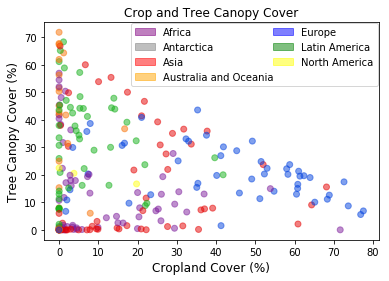

In [5]:
plt.scatter(df['cropland_cover'], 
            df['tree_canopy_cover'], 
            c = df['Continent_color'],
            alpha = .5)
plt.xlabel('Cropland Cover (%)', fontsize = 12)
plt.ylabel('Tree Canopy Cover (%)', fontsize = 12)
plt.title('Crop and Tree Canopy Cover')
purple_patch = mpatches.Patch(color = 'purple', label = 'Africa', alpha = .5)
grey_patch = mpatches.Patch(color = 'grey', label = 'Antarctica', alpha = .5)
red_patch = mpatches.Patch(color = 'red', label = 'Asia', alpha = .5)
orange_patch = mpatches.Patch(color = 'orange', label = 'Australia and Oceania', alpha = .5)
blue_patch = mpatches.Patch(color = 'blue', label = 'Europe', alpha = .5)
green_patch = mpatches.Patch(color = 'green', label = 'Latin America', alpha = .5)
yellow_patch = mpatches.Patch(color = 'yellow', label = 'North America', alpha = .5)
plt.legend(handles=[purple_patch, grey_patch, red_patch, orange_patch,
                   blue_patch, green_patch, yellow_patch],
           loc = 'best',
           ncol = 2,
           borderaxespad = .1,
           columnspacing = 0)

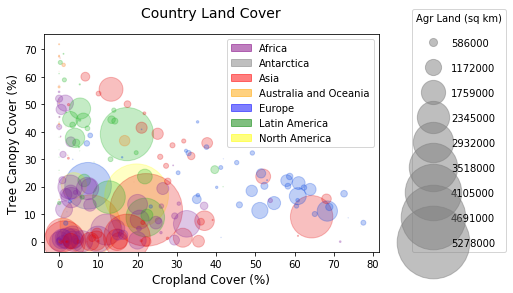

In [6]:
plt.scatter(df['cropland_cover'], 
            df['tree_canopy_cover'], 
            s = df['Agr_land'] / 1000,
            c = df['Continent_color'],
            alpha = .25)
plt.xlabel('Cropland Cover (%)', fontsize = 12)
plt.ylabel('Tree Canopy Cover (%)', fontsize = 12)
plt.title('Country Land Cover', y = 1.05, fontsize = 14)

max_land = df['Agr_land'].max() / 1000
# Convert between plot markersize and scatter s parameters
max_land_ms = sqrt(max_land)
h = [plt.plot([], color = 'gray', marker = 'o', ms = i , ls = '', alpha = .5)[0]
    for i in np.linspace(0, max_land_ms, num = 10)[1:]]
leg = plt.legend(handles = h, 
           labels = [int(i) * 1000 for i in np.linspace(0, max_land, num = 10)[1:]],
           loc = (1.1, 0),
           labelspacing = 1.5,
           title = 'Agr Land (sq km)')
ax = plt.gca().add_artist(leg)
plt.legend(handles=[purple_patch, grey_patch, red_patch, orange_patch,
                   blue_patch, green_patch, yellow_patch],
           loc = 1,
           ncol = 1)
plt.savefig('Land_cover.png', bbox_inches = 'tight')
plt.show()